In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Дискретное распределение (Версия для Python 3)

Сгенерируем выборку объёма 100 из дискретного распределения с шестью равновероятными исходами.

In [3]:
sample = np.random.choice([1,2,3,4,5,6], 100)

In [4]:
sample

array([1, 4, 5, 1, 5, 2, 4, 2, 6, 4, 5, 1, 2, 6, 1, 5, 4, 2, 2, 4, 3, 6,
       1, 3, 2, 1, 5, 6, 1, 5, 4, 4, 5, 2, 5, 4, 6, 5, 3, 3, 4, 3, 6, 4,
       1, 6, 1, 5, 1, 6, 4, 4, 6, 1, 2, 3, 5, 2, 3, 1, 1, 1, 5, 2, 5, 2,
       6, 5, 6, 2, 5, 6, 4, 6, 5, 2, 5, 1, 1, 1, 6, 4, 4, 1, 4, 1, 1, 1,
       1, 4, 1, 1, 4, 3, 1, 5, 5, 3, 1, 2])

Представим теперь, что эта выборка была получена не искусственно, а путём подбрасывания симметричного шестигранного кубика 100 раз. Оценим вероятности выпадения каждой из сторон с помощью частот:

In [6]:
# посчитаем число выпадений каждой из сторон:
from collections import Counter

c = Counter(sample)

print("Число выпадений каждой из сторон:")    
print(c)

# теперь поделим на общее число подбрасываний и получим вероятности:
print("Вероятности выпадений каждой из сторон:")
print({k: v/100.0 for k, v in c.items()})

Число выпадений каждой из сторон:
Counter({1: 26, 5: 19, 4: 18, 2: 14, 6: 14, 3: 9})
Вероятности выпадений каждой из сторон:
{1: 0.26, 4: 0.18, 5: 0.19, 2: 0.14, 6: 0.14, 3: 0.09}


Это и есть оценка функции вероятности дискретного распределения.

# Непрерывное распределение

Сгенерируем выборку объёма 100 из стандартного нормального распределения (с $\mu=0$ и $\sigma^2=1$):

In [11]:
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)

In [12]:
sample

array([-0.10995504, -1.03496901,  0.01520286,  0.84581156,  0.09843363,
        0.01497332, -0.06585369, -1.36462819, -0.19755308,  0.91676448,
       -0.52176031, -1.25068592,  1.08819624, -0.40523063,  0.37875855,
       -1.90197433,  2.31375391, -1.6477324 , -1.1092489 ,  1.46479615,
        1.0700762 , -0.28053555, -1.10449397, -0.85361633,  1.85367943,
       -0.82122441,  0.31285224,  0.44566252,  2.33461649, -2.05051043,
       -0.53775442,  2.06873587, -0.46852849, -0.60277705, -0.11882622,
        0.80682149, -0.38634242, -0.22510271, -0.21477504,  0.46489337,
       -0.41404455,  1.36796056, -0.03516401,  0.51220892,  1.56317473,
       -1.26565463,  1.37268478, -0.50165874, -0.08039848,  0.62099056,
       -0.00447662, -0.31866399,  2.858511  ,  1.42677957,  1.19735708,
        1.42353188, -0.08379206,  0.23832376,  2.26615573, -1.87300786,
        0.67022532, -0.33492824, -0.48584605,  0.32323236,  1.54875574,
        0.80193804, -0.07251539,  0.46444847,  0.19069299, -0.23

Эмпирическая функция распределения для полученной выборки:

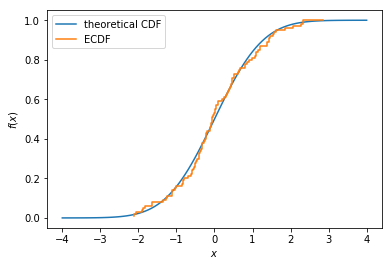

In [13]:
x = np.linspace(-4,4,100)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

Гистограмма выборки:

Text(0.5, 0, '$x$')

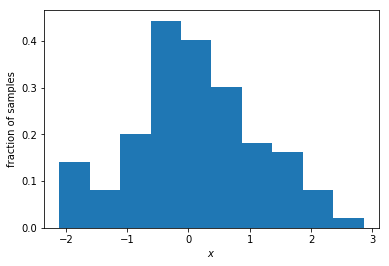

In [14]:
plt.hist(sample, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Попробуем задавать число карманов гистограммы вручную:

Text(0.5, 0, '$x$')

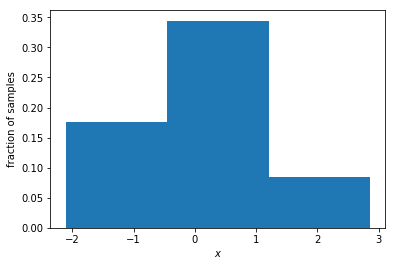

In [15]:
plt.hist(sample, bins=3, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Text(0.5, 0, '$x$')

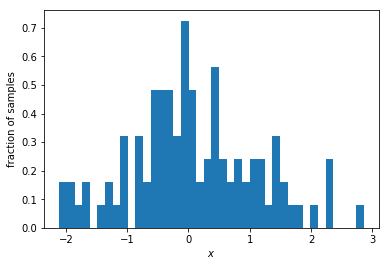

In [16]:
plt.hist(sample, bins=40, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Эмпирическая оценка плотности, построенная по выборке с помощью ядерного сглаживания:

Text(0.5, 0, '$x$')

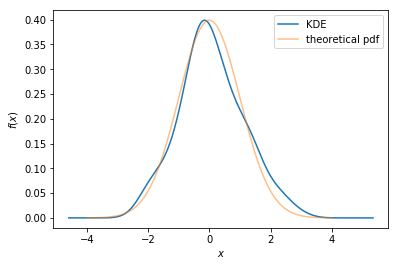

In [17]:
# для построения используем библиотеку Pandas:
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(-4,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

In [19]:
import math

0.6 - 2*math.sqrt(0.6*(1-0.6)/10)

0.2901613323034066

In [22]:
n = 2015 - 1885 + 1
EP = 1197.69
DP = 116182.2

In [23]:
Cl = EP - 3*math.sqrt(DP/n)
Cu = EP + 3*math.sqrt(DP/n)

In [26]:
print(Cl, Cu)

1108.3480546097924 1287.0319453902077


In [27]:
math.sqrt(DP/n)

29.780648463402596

In [28]:
365*1287.03

469765.95

In [29]:
EP + 3*math.sqrt(DP)

2220.2553035381166

In [30]:
n = 40
p = 0.625
Cl = p - 2*math.sqrt(p*(1-p)/n)
Cu = p + 2*math.sqrt(p*(1-p)/n)

In [31]:
print(Cl, Cu)

0.4719068910760514 0.7780931089239487


In [34]:
def puasson(l, k):
    return math.pow(l,k)*math.exp(-l)/math.factorial(k)

In [35]:
1 - puasson(3, 0)- puasson(3, 1)- puasson(3, 2)- puasson(3, 3)- puasson(3, 4)

0.18473675547622792

In [33]:
math.fact

AttributeError: module 'math' has no attribute 'fact'